In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.callbacks import EarlyStopping
import keras.backend as K

In [3]:
base_dir = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Feature_matrix\AIS_Weather_Lock\\'
os.chdir(base_dir)

In [4]:
# Load the datasets
X_train = np.load(base_dir + 'X_train.npy')
X_val = np.load(base_dir + 'X_val.npy')
X_test = np.load(base_dir + 'X_test.npy')

y_train = np.load(base_dir + 'y_train.npy')
y_val = np.load(base_dir + 'y_val.npy')
y_test = np.load(base_dir + 'y_test.npy')

In [5]:
# Reshape X_train to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("New shape of X_train:", X_train.shape)

New shape of X_train: (34654, 1, 11)


In [6]:
# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [7]:
input_shape = (X_train.shape[1], X_train.shape[2]) # timesteps, features

In [8]:
# Model architecture with L1 Regularization using GRU
model = Sequential([
    GRU(50, return_sequences=True, input_shape=input_shape, kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    GRU(50, kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    Dense(1)
])

In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.006793806619350815), 
              loss='mean_squared_error', 
              metrics=['mse', rmse, 'mae', 'mape'])

In [10]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 50)             9450      
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 24801 (96.88 KB)
Trainable params: 24801 (96.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
1083/1083 [==============================] - 6s 3ms/step - loss: 229348.2344 - mse: 229326.9688 - rmse: 467.6005 - mae: 271.4585 - mape: 2526515968.0000 - val_loss: 168719.2344 - val_mse: 168686.9531 - val_rmse: 400.4681 - val_mae: 229.2273 - val_mape: 2731781376.0000
Epoch 2/100
1083/1083 [==============================] - 3s 3ms/step - loss: 140913.8750 - mse: 140874.3438 - rmse: 365.7316 - mae: 213.5231 - mape: 2370829056.0000 - val_loss: 114973.3750 - val_mse: 114927.8125 - val_rmse: 330.7982 - val_mae: 195.0440 - val_mape: 2086103680.0000
Epoch 3/100
1083/1083 [==============================] - 3s 3ms/step - loss: 108706.2812 - mse: 108656.3906 - rmse: 322.3870 - mae: 195.0882 - mape: 2288977152.0000 - val_loss: 93892.4297 - val_mse: 93838.5859 - val_rmse: 299.0415 - val_mae: 179.6413 - val_mape: 2206352896.0000
Epoch 4/100
1083/1083 [==============================] - 3s 3ms/step - loss: 92275.9141 - mse: 92218.5859 - rmse: 296.8089 - mae: 180.7541 - mape: 2183710976.0

1083/1083 [==============================] - 3s 3ms/step - loss: 45280.3281 - mse: 45165.7891 - rmse: 205.4065 - mae: 123.1638 - mape: 2072700032.0000 - val_loss: 33771.9375 - val_mse: 33656.8242 - val_rmse: 174.8754 - val_mae: 101.3565 - val_mape: 2027303424.0000
Epoch 31/100
1083/1083 [==============================] - 3s 3ms/step - loss: 44454.8398 - mse: 44339.1211 - rmse: 203.5538 - mae: 122.3671 - mape: 2035121024.0000 - val_loss: 33604.9219 - val_mse: 33488.5664 - val_rmse: 174.9944 - val_mae: 101.5004 - val_mape: 2201203968.0000
Epoch 32/100
1083/1083 [==============================] - 3s 3ms/step - loss: 44182.9570 - mse: 44065.9414 - rmse: 202.5395 - mae: 121.7131 - mape: 2090418688.0000 - val_loss: 33681.1328 - val_mse: 33563.5430 - val_rmse: 174.8000 - val_mae: 100.6348 - val_mape: 2052801408.0000
Epoch 33/100
1083/1083 [==============================] - 3s 3ms/step - loss: 43819.8750 - mse: 43701.6953 - rmse: 201.9394 - mae: 121.4766 - mape: 2089876480.0000 - val_loss: 325

Epoch 60/100
1083/1083 [==============================] - 3s 3ms/step - loss: 39114.5273 - mse: 38968.1289 - rmse: 190.4606 - mae: 114.6969 - mape: 1992153216.0000 - val_loss: 29130.4707 - val_mse: 28983.6934 - val_rmse: 162.0491 - val_mae: 92.6790 - val_mape: 1960693888.0000
Epoch 61/100
1083/1083 [==============================] - 3s 3ms/step - loss: 38999.4102 - mse: 38852.1055 - rmse: 190.0890 - mae: 113.5267 - mape: 1989828608.0000 - val_loss: 28750.6367 - val_mse: 28602.8672 - val_rmse: 160.3666 - val_mae: 91.7214 - val_mape: 1955256960.0000
Epoch 62/100
1083/1083 [==============================] - 3s 3ms/step - loss: 38539.9102 - mse: 38391.6211 - rmse: 188.7555 - mae: 113.3647 - mape: 2035933824.0000 - val_loss: 28812.7246 - val_mse: 28663.8926 - val_rmse: 160.3983 - val_mae: 92.1121 - val_mape: 2061904512.0000
Epoch 63/100
1083/1083 [==============================] - 3s 3ms/step - loss: 38291.3047 - mse: 38142.0742 - rmse: 188.0736 - mae: 112.1624 - mape: 1957824384.0000 - val

In [13]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

233/233 [==============================] - 0s 1ms/step - loss: 28953.8711 - mse: 28799.9043 - rmse: 161.6159 - mae: 91.3556 - mape: 1674021248.0000
Test Loss: [28953.87109375, 28799.904296875, 161.6158905029297, 91.35562896728516, 1674021248.0]


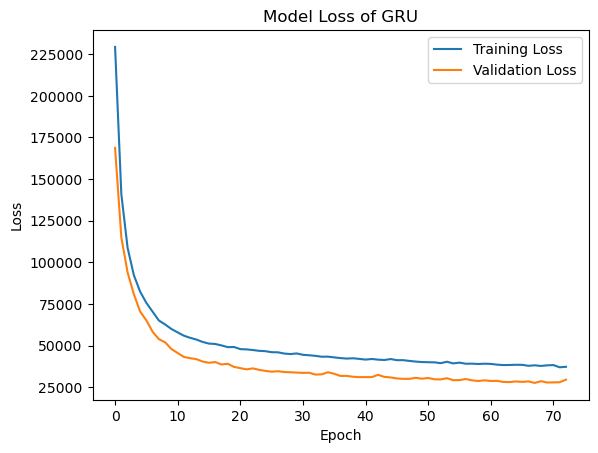

In [14]:
# Assuming history is the output of the model.fit() method
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss of GRU')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(X_test).flatten()  # Flatten predictions to ensure it's a 1D array
y_test_flattened = y_test.flatten()  # Flatten actual values for consistency

233/233 [==============================] - 1s 1ms/step


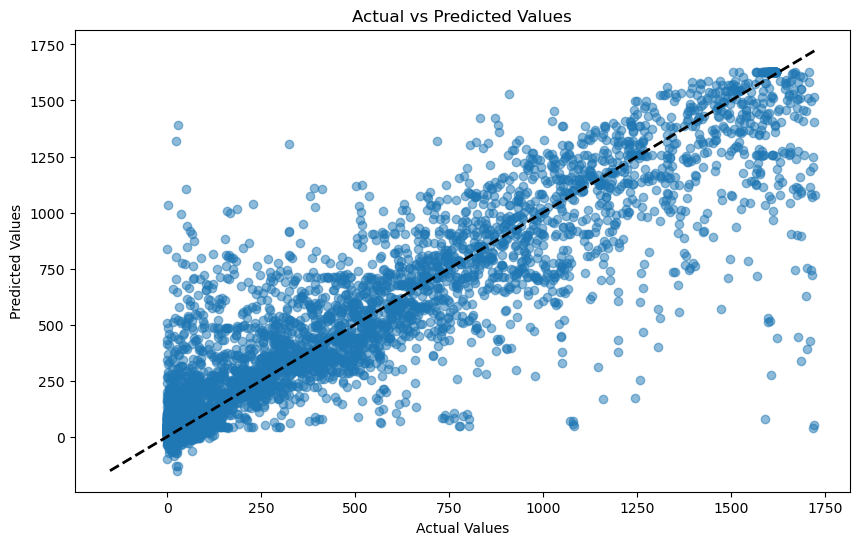

In [16]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flattened, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line of perfect predictions for reference
max_val = max(y_test_flattened.max(), y_pred.max())
min_val = min(y_test_flattened.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect predictions

plt.show()

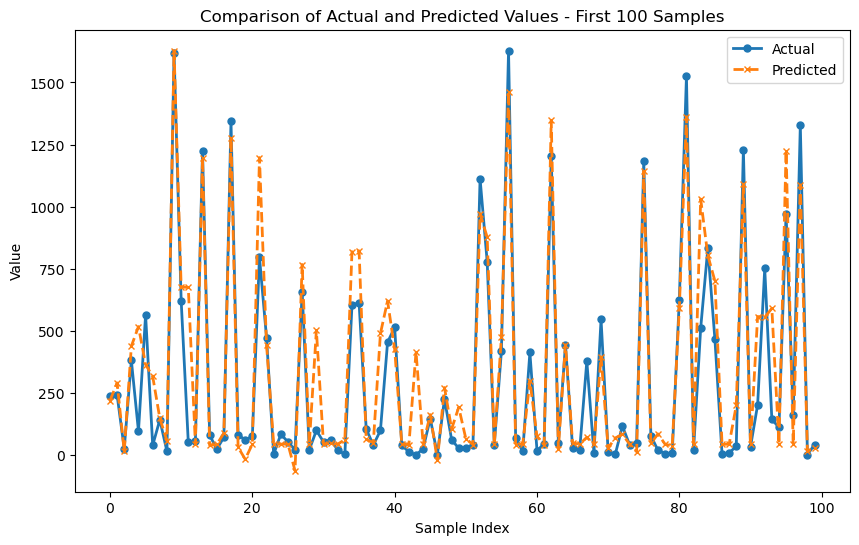

In [17]:
# Plotting a line plot for a clearer comparison for a subset
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened[:100], marker='o', label='Actual', linewidth=2, markersize=5)
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicted', linewidth=2, markersize=5)
plt.title('Comparison of Actual and Predicted Values - First 100 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

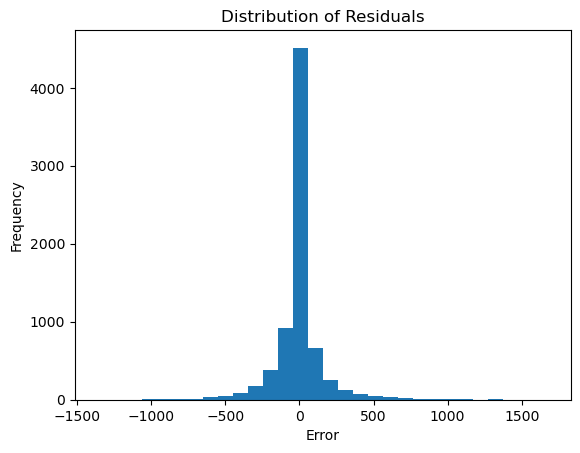

In [18]:
# Calculating residuals
residuals = y_test - y_pred.squeeze()  # Adjust dimensions if necessary

# Plotting the histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [19]:
# Evaluate the model
loss, mse, rmse, mae, mape = model.evaluate(X_test, y_test)
print("Test loss (MSE):", loss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

233/233 [==============================] - 0s 1ms/step - loss: 28953.8711 - mse: 28799.9043 - rmse: 161.6159 - mae: 91.3556 - mape: 1674021248.0000
Test loss (MSE): 28953.87109375
Mean Squared Error (MSE): 28799.904296875
Root Mean Squared Error (RMSE): 161.6158905029297
Mean Absolute Error (MAE): 91.35562896728516
Mean Absolute Percentage Error (MAPE): 1674021248.0
